In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\classification':
  os.chdir(r'C:\Users\k\Downloads\VT classes\Grad classes\CS 5805\CS 5805 Final Project\blog\classification')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\k\AppData\Local\Temp\ipykernel_45432\4229732740.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\importlib\\_bootstrap_external.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\codecs.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\aliases.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\__init__.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\encodings\\utf_8.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\io.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\stat.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\_collections_abc.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\genericpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\ntpath.py": 1686090633.0, "C:\\Users\\k\\anaconda3\\envs\\homl3\\lib\\os.py": 1686090633.0, "C:\\Users\\k

In [2]:
import numpy as np
import pandas as pd
dat = pd.read_csv("currDatSteelCity23.csv")
dat = dat.drop(['Unnamed: 0'], axis=1)
dat.head()

,Opponent,idx,DJI.ID,Full.ID,Game.ID,Point.ID,Possession.ID,Defense.Type,Handler,Receiver,...,BasicEPAOpp,TrueEPAHan,TrueEPARec,EPA,OppFactor2,EPAHan,EPARec,EPAHanRes,EPAHanTot,EPAHan2
0,Binghamton,538,472,1.1.1,1,1,1,Man,NaN,Micah,...,0.000,0.000,0.000,0.000,0.0,NaN,NaN,0.000,NaN,NaN
1,Binghamton,539,472,1.1.1,1,1,1,Man,Micah,John,...,0.024,0.018,0.005,0.053,0.0,0.039,0.014,0.015,0.054,0.059
2,Binghamton,540,472,1.1.1,1,1,1,Man,John,Dan B,...,0.011,0.008,0.002,0.042,0.0,0.031,0.011,0.000,0.031,0.046
3,Binghamton,541,472,1.1.1,1,1,1,Man,Dan B,Gribs,...,-0.249,-0.249,0.000,-0.420,0.0,-0.420,0.000,0.000,-0.420,-0.420
4,Binghamton,542,472,1.1.2,1,1,2,Man,NaN,Micah,...,0.000,0.000,0.000,0.000,0.0,NaN,0.000,0.000,NaN,NaN


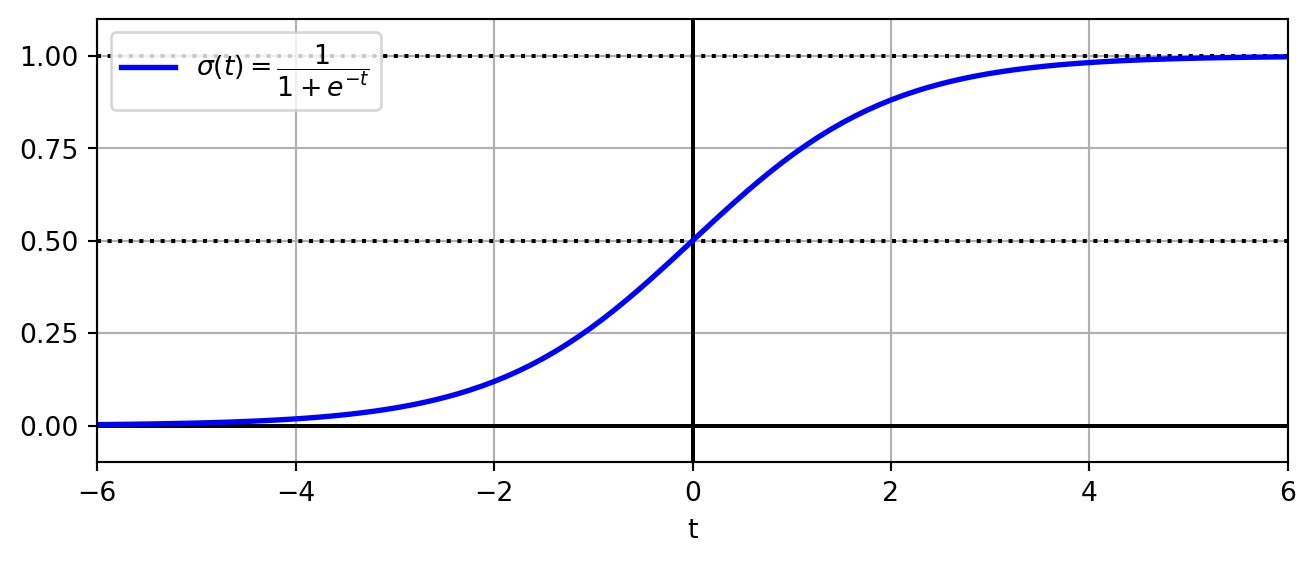

In [3]:
# https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb
import matplotlib.pyplot as plt 
lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
plt.show()

C:\Users\k\AppData\Local\Temp\ipykernel_45432\149940274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype('str')
C:\Users\k\AppData\Local\Temp\ipykernel_45432\149940274.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = enc.fit_transform(X[col])


Testing accuracy: 0.8838383838383839
Testing accuracy: 0.043478260869565216
Testing accuracy: 0.9942857142857143
Testing Classification Report
              precision    recall  f1-score   support

           0       0.50      0.04      0.08        23
           1       0.89      0.99      0.94       175

    accuracy                           0.88       198
   macro avg       0.69      0.52      0.51       198
weighted avg       0.84      0.88      0.84       198



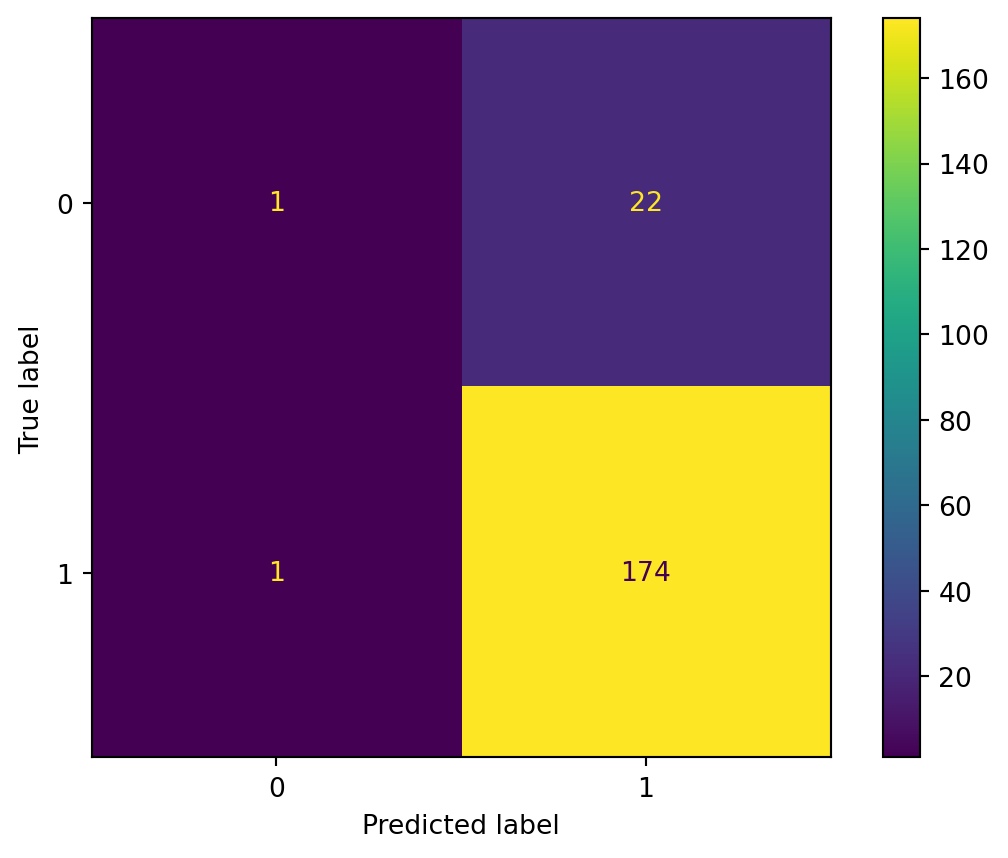

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

X = dat[['Opponent', 'Defense.Type', 'start.x', 'start.y', 'end.x', 'end.y', 'Force.Break', 'Throw.Type', 'Throw.Group']]
enc = LabelEncoder()
for col in ['Opponent', 'Defense.Type', 'start.x', 'start.y', 'end.x', 'end.y', 'Force.Break', 'Throw.Type', 'Throw.Group']:
    X[col] = X[col].astype('str')
    X[col] = enc.fit_transform(X[col])

y = dat['Action.Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)
print("Testing accuracy:", accuracy_score(y_test, y_test_pred))
matrix = confusion_matrix(y_test, y_test_pred)
print("Testing accuracy:", (matrix.diagonal()/matrix.sum(axis=1))[0])
print("Testing accuracy:", (matrix.diagonal()/matrix.sum(axis=1))[1])
print("Testing Classification Report")
print(classification_report(y_test, y_test_pred))

cmd = ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

Testing class accuracies: [0.2173913  0.93714286]
Testing precision: 0.9010989010989011
Testing recall: 0.9371428571428572
Testing f1: 0.9187675070028012
              precision    recall  f1-score   support

           0       0.31      0.22      0.26        23
           1       0.90      0.94      0.92       175

    accuracy                           0.85       198
   macro avg       0.61      0.58      0.59       198
weighted avg       0.83      0.85      0.84       198



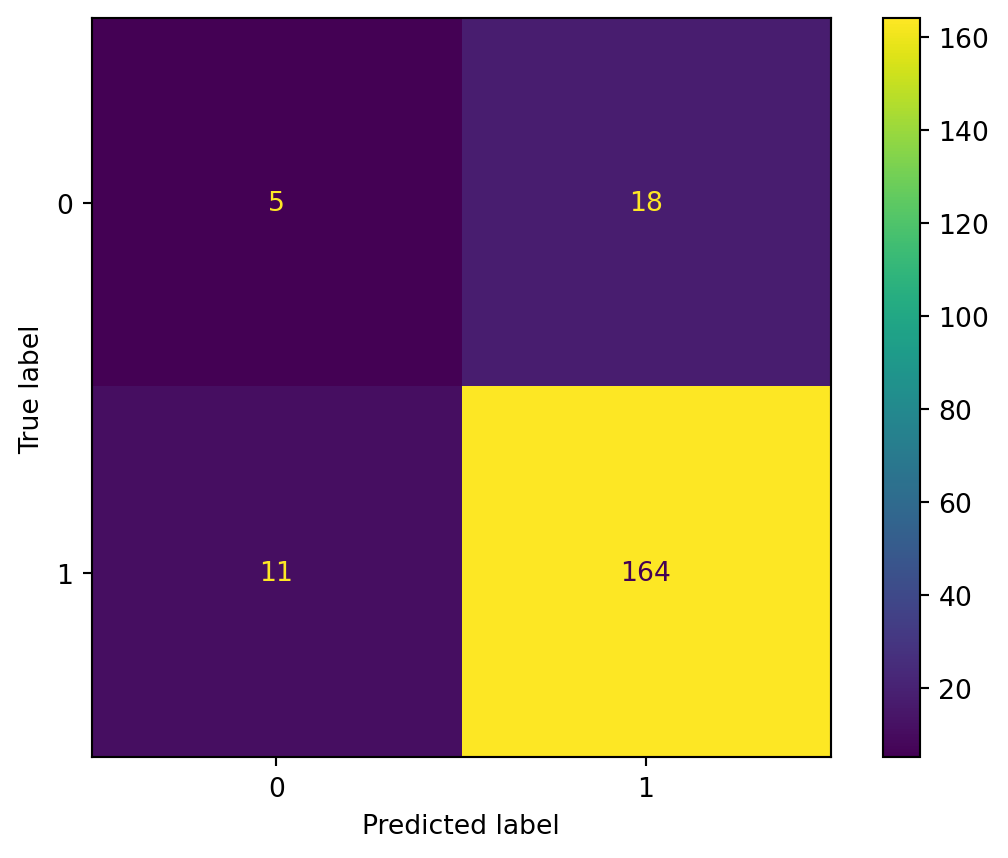

In [5]:
# Training the decision tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=40)
tree_clf.fit(X_train, y_train)

# Predicting on test data
y_test_pred = tree_clf.predict(X_test)
matrix = confusion_matrix(y_test, y_test_pred)
print("Testing class accuracies:", matrix.diagonal()/matrix.sum(axis=1))
print("Testing precision:", precision_score(y_test, y_test_pred))
print("Testing recall:", recall_score(y_test, y_test_pred))
print("Testing f1:", f1_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

cmd = ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test)
plt.show()